In [2]:
import pandas as pd

In [3]:
#Load Dataset
df=pd.read_csv('/Users/zhouwenbin/Documents/crypto/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv') 


In [50]:
df.head()

,date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df = df.rename(columns={"Timestamp":"date"})

In [52]:
df["date"] = pd.to_datetime(df["date"],unit="s")
df.head()

,date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df1=df

In [54]:
df1

,date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4363452,2020-04-21 23:56:00,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,2020-04-21 23:57:00,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,2020-04-21 23:58:00,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,2020-04-21 23:59:00,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090


In [55]:
df2 = df1[['date',"Weighted_Price"]]

In [56]:
df2=df2[(df2['date'] >='2019-05-01 00:00:00') & (df2['date'] <= '2019-06-01 23:59:00')]

In [58]:
df2=df2.dropna()

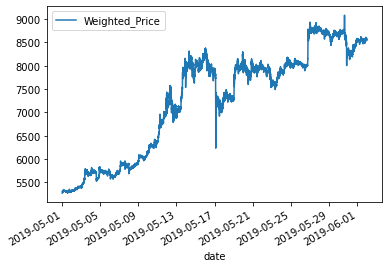

In [59]:
df2.plot(kind='line',x='date',y='Weighted_Price')

In [61]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [66]:
batch_size = 100
timesteps = 50

In [67]:
def get_train_length(dataset, batch_size, test_percent):
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))
length = get_train_length(df_data_1, batch_size, 0.1)

41200


In [68]:
upper_train = length + timesteps*2
df_data_1_train = df_data_1[0:upper_train]
training_set = df_data_1_train
training_set.shape

(41300, 1)

In [92]:
# Feature Scaling
#scale between 0 and 1. the weights are esier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled[0]
# training_set_scaled[0,0]

array([0.00036374])

In [102]:


X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#30 items per array (timestep) 
# print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#30 items per array (timestep) 
print(np.array(y_train).shape)
print(y_train[0:1])

41250
41200
41200
(41200, 50)
(41200, 50)
[array([0.00841909, 0.00915372, 0.0094442 , 0.00923429, 0.00925693,
       0.00990258, 0.0091414 , 0.00874028, 0.00869218, 0.008583  ,
       0.01018588, 0.01042041, 0.01042909, 0.01070024, 0.01112376,
       0.01175124, 0.01077196, 0.0102064 , 0.0120319 , 0.01147501,
       0.01081945, 0.01104571, 0.01110124, 0.01134332, 0.01138813,
       0.01193433, 0.01192389, 0.01243706, 0.01259667, 0.01206433,
       0.01174143, 0.01113975, 0.01112128, 0.01004723, 0.00920683,
       0.00887755, 0.00882118, 0.0097191 , 0.00911829, 0.00833005,
       0.00960445, 0.01016613, 0.009879  , 0.00991933, 0.00962975,
       0.00902588, 0.00939164, 0.00885552, 0.00980509, 0.01005856])]


In [71]:


# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)



(41200, 50, 1)
(41200, 50, 1)


In [72]:
X_train.shape

(41200, 50, 1)

In [73]:


# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py



In [74]:


# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (100, 50, 1)              0         
_________________________________________________________________
lstm_5 (LSTM)                (100, 50, 10)             480       
_________________________________________________________________
lstm_6 (LSTM)                (100, 50, 10)             840       
_________________________________________________________________
dense_3 (Dense)              (100, 50, 1)              11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [75]:
epochs = 10
for i in range(epochs):
    print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()
    

Epoch: 0
Epoch 1/1
41200/41200 [==============================] - 13s 325us/step - loss: 0.0263
Epoch: 1
Epoch 1/1
41200/41200 [==============================] - 13s 312us/step - loss: 0.0296
Epoch: 2
Epoch 1/1
41200/41200 [==============================] - 13s 325us/step - loss: 0.0198
Epoch: 3
Epoch 1/1
41200/41200 [==============================] - 14s 331us/step - loss: 0.0183
Epoch: 4
Epoch 1/1
41200/41200 [==============================] - 14s 338us/step - loss: 0.01730s - loss: 
Epoch: 5
Epoch 1/1
41200/41200 [==============================] - 14s 351us/step - loss: 0.0169
Epoch: 6
Epoch 1/1
41200/41200 [==============================] - 14s 336us/step - loss: 0.0165
Epoch: 7
Epoch 1/1
41200/41200 [==============================] - 13s 319us/step - loss: 0.0159
Epoch: 8
Epoch 1/1
41200/41200 [==============================] - 13s 321us/step - loss: 0.0160
Epoch: 9
Epoch 1/1
41200/41200 [==============================] - 13s 320us/step - loss: 0.0156


In [76]:
#save model
import h5py
regressor_mae.save(filepath="my_model_with_mae_30_ts.h5")

In [ ]:
# #load model
# import h5py
# regressor_mae = load_model(filepath="/Users/zhouwenbin/Documents/crypto/cryptocoin-project/my_model_with_mae_30_ts.h5")

In [77]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [78]:
test_length = get_test_length(df_data_1, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

45700
45700
4400


In [79]:
# construct test set

#subsetting
df_data_1_test = df_data_1[upper_train:upper_test] 
test_set = df_data_1_test

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [80]:
X_test.shape

(4400, 50, 1)

In [81]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

(4400, 50, 1)
(4400, 50)
(4350, 1)


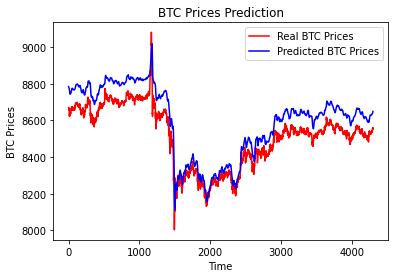

In [88]:
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real BTC Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted BTC Prices')
plt.title('BTC Prices Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Prices')
plt.legend()
plt.show()

In [83]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

90.06344366112621


In [84]:
#MAE (mean absolut error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

83.28554322012062


In [94]:
from numpy import array
seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
seq = array(seq)
X, y = seq[:, 0], seq[:, 1]

In [97]:
X,y

(array([0. , 0.1, 0.2, 0.3, 0.4]), array([0.1, 0.2, 0.3, 0.4, 0.5]))

In [101]:
import keras
labels = array([0, 2, 1, 2, 0])
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)